Integral of piece 1 over [0, 0.8] = 0.000000
Integral of piece 2 over [0.8, 1.6] = 15999999999999.998047
Integral of piece 3 over [1.6, 1.7] = 0.000000
Integral of piece 4 over [1.7, 3] = 21970000000000.007812
Total integral of the piecewise function: 37970000000000.007812


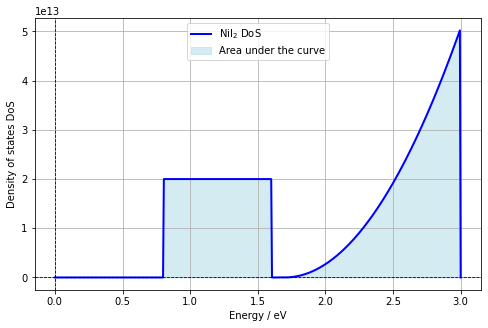

In [69]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function and its intervals
def piecewise_function(x):
    if 0 <= x < 0.8:
        return 0  
    elif 0.8 <= x < 1.6:
        return 2e13 
    elif 1.6 <= x < 1.7:
        return 0
    elif 1.7 <= x < 3 :
        return 3e13 * (x-1.7)**2
    else:
        return 0  # Outside defined intervals, the function is 0

# Define intervals for each piece
intervals = [(0, 0.8), (0.8, 1.6), (1.6, 1.7), (1.7, 3)]

# Numerical integration for each piece
total_integral = 0
for i, (a, b) in enumerate(intervals):
    integral_value, _ = quad(piecewise_function, a, b)
    print(f"Integral of piece {i+1} over [{a}, {b}] = {integral_value:.6f}")
    total_integral += integral_value

# Display the total integral
print(f"Total integral of the piecewise function: {total_integral:.6f}")

x_values = np.linspace(0, 3, 500)  # Sample points from 0 to 2
y_values = [piecewise_function(x) for x in x_values]  # Evaluate the piecewise function

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="NiI$_2$ DoS", color="blue", lw=2)
plt.fill_between(x_values, y_values, color="lightblue", alpha=0.5, label="Area under the curve")
plt.xlabel("Energy / eV")
plt.ylabel("Density of states DoS")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add x-axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add y-axis
plt.legend()
plt.grid(True)
plt.show()


$I_t \propto \int^{e|V|}_0 g_s(E) exp(-2z \sqrt{\frac{2m}{\hbar^2} (\bar{\phi} + E - \frac{eV}{2})}) dE$


In [87]:
import numpy as np
from scipy.integrate import quad

def findI(V,z, g_s):
    """Calculate tunelling current I_t following 1D STM equation
    
    Note: Using set points V=1V, z = 2 angstrom and g_s = 3.33e9 gives 100pA

    Args:
        V (V): _description_
        z (_type_): _description_
        g_s (): 

    Returns:
        _type_: _description_
    """
    
    # Constants (in SI units)
    hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
    e = 1.602176634e-19   # Elementary charge (C)
    m = 9.10938356e-31    # Electron mass (kg)
    phi_bar = 0.5 * e     # Average barrier height (e.g., 0.5 eV in Joules)
    
    z = z *1e-10 #convert to angstrom
    
    def dos(E): # calculate density of states - piecewise function
        if 0 <= E < 0.8 * e:  # Convert 0.8 eV to Joules
            return 0
        elif 0.8 * e <= E < 5 * e:  # Convert 5 eV to Joules
            return g_s  # Example density of states magnitude
        else:
            return 0

    def integrand(E, V, z, phi_bar): # calculate integrand in 1D STM equation
        argument = phi_bar + E - e * V / 2
        if argument < 0:
            return 0  # Tunneling probability becomes non-physical for argument < 0
        tunneling_term = np.exp(-2 * z * np.sqrt(2 * m * argument) / hbar)
        return dos(E) * tunneling_term

    # carry out integration
    intervals = [(0, 0.8 * e), (0.8 * e, 5 * e)] # define DoS intervals
    total_integral = 0
    for i, (a, b) in enumerate(intervals):
        integral, _ = quad(integrand, a, b, args=(V, z, phi_bar))
        total_integral += integral

    current_pA = total_integral * 1e12
    print(f"Current = {current_pA:.3e}pA")
    
    return current_pA


In [88]:
findI(1, 2, g_s=3.33e9)

Current = 1.006e+02pA


100.61948105897639